# Week 4 -- Electrons moving in fields

This week we'll explore some of the radiation mechanisms we're discussing in class. Adapted from my grad school radiative homework (Q1) and developed with McKinley Brumback (Q2).

In [2]:
import matplotlib.pyplot as plt, numpy as np
import matplotlib as mpl
import astropy.units as u, astropy.constants as c
import tools
%matplotlib inline

## Q1: Bremsstrahlung in the Hydra A galaxy cluster

This problem is based on X-ray observations of the Hydra A cluster of galaxies, using data from David et al. (2001): https://ui.adsabs.harvard.edu/abs/2001ApJ...557..546D/abstract

As we discussed in class, the Bremsstrahlung cooling time in galaxy clusters is less than the age of the Universe only in the interior of the cluster. As the center cools, pressure from the outer layers of gas should cause the inward flow of material, called the cooling flow. This simple process does not match up with all available observations (for a review: https://arxiv.org/abs/astro-ph/0201386). In particular, it suggests that there should be x-ray features associated with the cooler gas, and enhanced star formation, neither of which are observed. It may be that the cooling flow still exists but is balanced by extra heating.

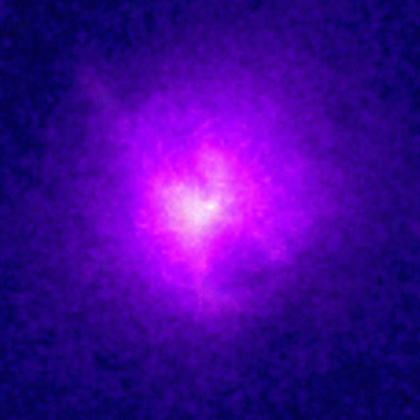

In [2]:
from IPython.display import Image
Image(filename='pro4_data/0087_xray_420.jpg') 
## the argument to filename is the file path to the images, which you 
## downloaded in the zip file. If your file structure differs from
## mine you'll have to change this

+ Read in the data from Figure 3 in the Hydra A paper (david.txt) and remake the figure to check that the data have been imported properly. We'll use the same astropy function we've been using in previous projects, but you'll need to use ``data_start`` keyword to read in the data properly. You can find the documentation for this keyword here: https://docs.astropy.org/en/stable/api/astropy.io.ascii.read.html#astropy.io.ascii.read

In [ ]:
import astropy.io.ascii as a


<font color='seagreen'>

This matches Figure 3 from the paper. This figure shows the de-projected electron number density: the 3-D electron density is modeled using the assumed emissivity and the surface brightness of the gas.

+ Fit the data to the "$\beta$-model":
$n_e(r) = n_0 \times \left( 1+r^2/r_0^2 \right)^{-3\beta/2}$ where $r$ is the distance from the cluster center. This function is the number density of electrons $n_e$ as a function of $r$. $n_0$, $r_0$, and $\beta$ are constants of unknown value for which you will use a python fitting function to determine the value. That function is ``curve_fit`` from the scipy.optimize module. A quick google search will get you to the documentation for ``curve_fit``: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
I find the examples at the bottom of the python documentation pages to most helpful in figuring out how to use new functions.

In [ ]:
from scipy.optimize import curve_fit

def betamodel(r, n0, r0, beta):
    """
    This function should return ne(r) for the beta model.
    The free parameters are n0, r0, and beta.
    The dependent variable is r.
    """
    ## YOUR CODE HERE
    
## YOUR CODE HERE

+ Write a function to calculate the free-free emissivity ($\epsilon^\mathrm{ff}$) as a function of $r$. Assume that the cluster gas is in thermal equilibirum and consists of 75% hydrogen and 25% hydrogen atoms by number, both fully ionized.
+ Plot the cooling time as a function of radius. Estimate the cooling time by comparing $\epsilon^\mathrm{ff}$ with the thermal energy density of the gas (as in class). Comment on whether this matches Figure 4 from the paper.

For a fully ionized plasma, $n_\mathrm{e} = n_\mathrm{H} + 2n_\mathrm{He} = \frac{3}{4} n_\mathrm{i} + \frac{1}{4} 2 n_\mathrm{i} = \frac{5}{4} n_\mathrm{i}$. Thus $n_\mathrm{i} = \frac{4}{5}n_\mathrm{e}$.

For each ion:

$n_\mathrm{H} = \frac{3}{4} n_\mathrm{i} = \frac{3}{4} \times \frac{4}{5}n_\mathrm{e} = \frac{3}{5} n_\mathrm{e}$ 

$n_\mathrm{He} = \frac{1}{4} n_\mathrm{i} = \frac{1}{4} \times \frac{4}{5}n_\mathrm{e} = \frac{1}{5} n_\mathrm{e}$

In [ ]:

def calc_totalemissivity(ne, T=4.06e7*u.K):
    """
    Total emissivity as a function of radius; Eq 5.15b from Rybicki and Lightman.
    ne (electron density) cm^-3
    T (temperature) K
    """


def calc_thermal(ne, T=4.06e7*u.K):
    """
    Thermal energy of the gas as a function of radius; as in class.
    ne (electron density) cm^-3
    """


In [ ]:


#this makes nice axes
plt.yscale('log')
plt.xscale('log')

plt.ylabel("Cooling time ({})".format(tcool.unit.to_string('latex_inline')))
plt.xlabel("Radius, from cluster center ({})".format(rad.unit.to_string('latex_inline')))
plt.gca().xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1g'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1g'))

<font color='seagreen'>

Your answer

+ Plot the emissivity as a function of wavelength for three different temperatures between 1e7 and 1e8 K, which covers the temperatures of most galaxy clusters. Use the same electron density of $10^{-2}$ cm$^{-3}$ for each (any ne fine for 2019). Try using a for loop to plot the different temperatures.

Note this isn't quite a spectrum, since it is calculated per unit volume and anything we observe will have some volume to it. 

In [ ]:
def calc_emissivity(ne, hnu, T=4.06e7*u.K):
    """
    Emissivity per frequency as a function of radius; Eq 5.14b from Rybicki and Lightman.
    ne (electron density) cm^-3
    hnu (photon energy) eV
    T (temperature) K
    """
    gB = 1.2 ## per the text, a Gaunt factor of 1.2 will be accurate within 20%
    
    # calculate the factor [ne ni Z**2] for H and He ions
    fac_H = ne*(3/5*ne)*(1**2)
    fac_He = ne*(1/5*ne)*(2**2)
    
    val = -hnu/c.k_B/(T)
    return 6.8e-38*T**-0.5*(fac_H+fac_He)*gB*u.erg*u.cm**3*u.K**0.5/(u.s*u.Hz)*np.exp(val)

In [ ]:


# this makes nice axes
plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1g'))
plt.xlabel("hv ({})".format(hnu.unit.to_string()))
plt.ylabel("Emissivity ($\mathrm{erg} \mathrm{cm}^{-3} s^{-1} \mathrm{Hz}^{-1}$)")

+ Plot the emissivity as a function of wavelength for 1e4 K, the temperature of an HII region. Although the electron density only matters for the normalization (which isn't too important right now), use $n_e=n_i=10^3/cm^3$. For a typical HII region, the gas becomes optically thick around 3GHz; at this point, the spectrum becomes that of the source function. This is assumed to be a blackbody, and the spectrum will drop off sharply at large frequencies. Draw a vertical line at 3GHz and use the annotate or text features to label it.


In [ ]:
# plt.annotate(r"$\tau\sim1$", (0,0)) # example annotation with latex


For thermal equilibrium, from Eq 1.37:
$$
\alpha_\nu = B_\nu(T)/j_\nu
$$
which results in Eq 5.18b for bremsstrahlung emission, $\alpha_\nu^{ff}$ in cgs units:
$$
\alpha_\nu^{ff} = 3.7\times10^8 T^{-1/2} Z^2 n_e n_i \nu^{-3} (1-e^{-h\nu/kT})
$$
From Eq 1.26,
$$
\tau_\nu^{ff}(s) = \int_{s_0}^{s}\alpha_\nu(s')ds'
$$
Taking into account the frequency and temperature dependence of the Gaunt Factor, one finds:
$$
\tau_\nu = 8.2\times10^{-2}T^{-1.35}\nu^{-2.1}E_M
$$
where $E_M=Z^2\int_0^s n_e n_i ds'$ and is given in pc cm$^{-6}$, the temperature is in K, and the frequency is given in GHz.

+ Consider the HII region from before. Calculate the intensity as a function of frequency for bremsstrahlung emission, taking into account bremsstrahlung self-absorption. Plot the intensity as a function of frequency. Assume:
    + Thermal equilibrium
    + That the background flux is negligible. 
    + The number density and temperature of the HII region from previously.
    + A size of 5pc. 

+ Using a figure, demonstrate the where the optical depth is large, the intensity is the Planck intensity.

You can use the provided Planck intensity function, which is different than previously in that it returns $I_\nu$ in cgs units (that is to say, it's what you want for this task!)

In [ ]:
# use this for your frequency spacing
nu = np.logspace(-1,6,500)*u.GHz

## Q2: Cyclotron absorption in Her X-1

Her X-1 is an x-ray binary occurs when material from a companion star accretes onto a black hole or neutron star. As the name suggests, they are strong x-ray emitters, with contributions from the blackbody, cyclotron, Bremmstrahlung, and two iron lines that are heavily pressure broadened. Each of these contributions is "Comptonized" which is to say, has been re-preocessed by Compton scattering. In this problem we will focus on cyclotron emission, which is the non-relativistic version of synchrotron. In Her X-1, in addition to broad cyclotron emission, there is a distinct absorption feature that is attriuted to absortpion of hot gas at the gyrofrequency (Eq 6.4, with $\gamma=1$ for non-relativistic electrons).

The data for this problem come from Fuerst et al (2013): https://ui.adsabs.harvard.edu/abs/2013ApJ...779...69F/abstract

The image below shows the x-ray data and a sophisticated model from Wolff et al (2016; https://ui.adsabs.harvard.edu/abs/2016ApJ...831..194W/abstract ). This is a physically motivated model, starting with parameters that describe the accretion and shock parameters; most models are phenomelogical, employing a broken power law to describe the contibutions to the total spectrum of the many different processes.
Bremsstrahlung strongly dominates the continuum, and a clear dip can be seen that corresponds to absorption at the gyrofrequency. 

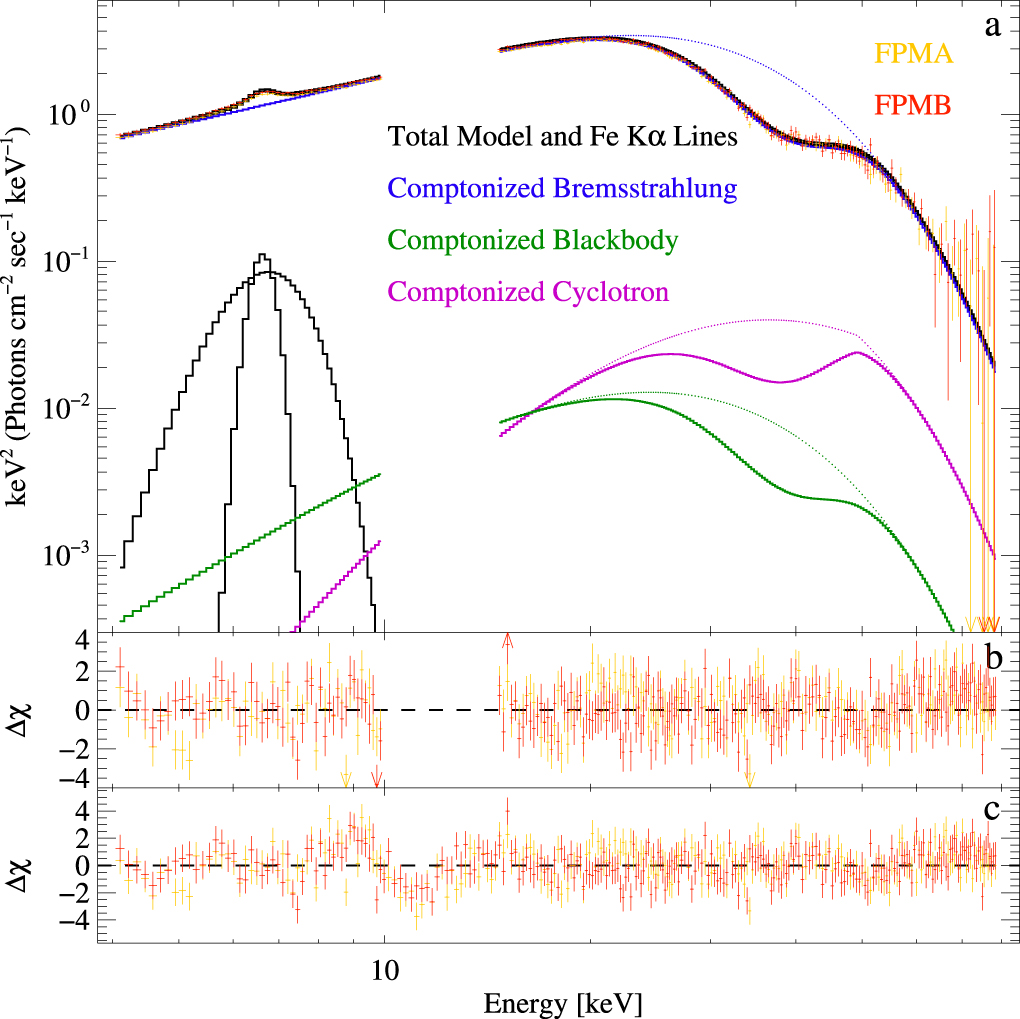

In [4]:
from IPython.display import Image
Image(filename='pro4_data/apjaa3c98f1_hr.jpeg', width=500)

Former Dartmouth grad student McKinley Brumback has fit the data for all components except for the cyclotron absorption, and provided the input data and the residuals (the residuals in this case are the data divided by the model, in this case). 
+ Read in and make two plots: (1) the data with error bars and the model and (2) the residuals with error bars. You can use ``plt.errorbar`` to plot data with x and/or y error bars.

In [ ]:
import astropy.io.ascii as a
data=a.read('pro4_data/herx1data.qdp', header_start=2, data_start=3, 
            format='csv', delimiter=' ', fill_values=['nn'])
# note syntax for fill_values changed in python3, requiring the brackets

+ The residuals have removed the model, but the model didn't include the cyclotron component, so this component is still present in the data. It's the last dip on the right. Using the residuals, fit a Gaussian to the cyclotron absorption feature. Plot the model on top of the residuals. The center of the Gaussian is the gyrofrequency. ``curve_fit`` isn't very sophisticated, so give it reasonable guesses for the starting parameters.

+ Using the version of Eq 6.4 below and the gyrofrequency you measured above to calculate the magnetic field of the neutron star.

$$
\nu_{g} = 28 \mathrm{GHz} \times (B/T)
$$

Here the magnetic field $B$ is in Tesla (I'm using $T$ here to indicate the units, not temperature), the frequency is in GHz, and $\gamma$ is assumes to be $1$.

If a neutron star does not display the cyclotron absorption feature, we must resort to other means of estimating its magnetic field. One such way is described in Hickox, Narayan, and Kallman (2004; https://iopscience.iop.org/article/10.1086/423928 ).

+ Taking the blackbody flux temperture $kT_{BB}=0.25$keV from McKinley's fit and $L_X=2\times10^{38}$ erg/s, calculate the radius of the emitting surface ($R_{BB}$), assuming the following form:
$$
R_{BB}^2 = \frac{L_x}{4\pi\sigma T_{BB}^4}
$$
Note that this isn't quite the blackbody fux equation you are used to, as it assumes that the flux originates from a disk-like structure rather than the full spherical shell. The scenario is illustrated below in a figure from the paper by Hickox and co (the neutron star is at the center).

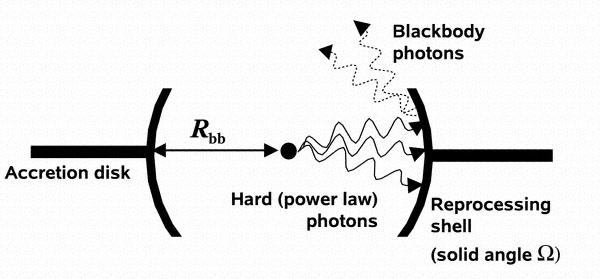

In [6]:
Image(filename='pro4_data/hickox_fg9.gif', width=500) 

Make the assumption that $R_{BB}$ corresponds to the magnetospheric radius, $R_M$:
$$
R_M = 1.5\times10^8 \mathrm{cm}\, \left(\frac{M}{M_\odot}\right)^{1/7} \left(\frac{R}{10^6 \mathrm{cm}}\right)^{10/7} \left(\frac{L}{10^{37} \mathrm{erg/s}}\right)^{-2/7} \left(\frac{B}{10^{12} \mathrm{G}}\right)^{4/7}    
$$

+ Calculate the magnetic field from $R_M$ and comment on how it compares to the calculation from the cyclotron frequency. You may assume that $R=10^6$cm and $M=1.5M_\odot$. You don't need to do this calculation in python.